In [1]:
import pymolzilla.processing as pm

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=8) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=8) #fontsize of the x tick labels
plt.rc('ytick', labelsize=8) #fontsize of the y tick labels
plt.rc('legend', fontsize=8) #fontsize of the legend

loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
preprocessing set: 0
preprocessing set: 1
preprocessing set: 2
preprocessing set: 3
preprocessing set: 4
preprocessing set: 5
loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
preprocessing set: 0
preprocessing set: 1
preprocessing set: 2
preprocessing set: 3
preprocessing set: 4
preprocessing set: 5
processing set: 0
processing set: 1
processing set: 2
processing set: 3
processing set: 4
processing set: 5


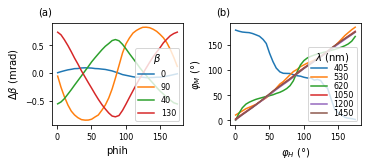

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(5,2.2),constrained_layout=True)

ax1.set_xlabel(r"$\varphi_H$ ($\degree$)")
ax1.set_ylabel(r"$\Delta\beta$ (mrad)")
ax2.set_xlabel(r"$\varphi_H$ ($\degree$)")
ax2.set_ylabel(r"$\varphi_M$ ($\degree$)")

ax1.text(-0.1, 1.08, "(a)", transform=ax1.transAxes)
ax2.text(-0.1, 1.08, "(b)", transform=ax2.transAxes)

f = pm.cofe_room_t_mirrors()
f.load()
f.preprocess()
for ff in f:
    ff.collect_merge()
f[3].data = f[3].data[['phih',0.,90.,40.,130.]]

f[3].plot_all(ax1)
ax1.legend(title=r"$\beta$", labels=[0,90,40,130])

g = pm.cofe_room_t_mirrors()
g.load()
g.preprocess()
g.process()

for gg in g:
    exp = -gg.data[45.] + 1j * gg.data[0.]
    gg.phim = np.degrees(np.angle(exp))/2
    
g[0].phim += 90
g[1].phim += 90
g[2].phim += 90
#g[4].phim += 90
#g[5].phim += 90

g[0].phim[0]+=180
for gg in g[1:]:
    gg.phim += np.round((gg.data['phih']-gg.phim)/180)*180

labs=['405','530','620','1050','1200','1450']

for i in range(6):
    ax2.plot(g[i].data['phih'], g[i].phim, label=labs[i])

ax2.legend(title=r"$\lambda$ (nm)", labelspacing=0, loc='lower right')

fig.savefig('out/uvod-data.pdf')